# <span style="color:royalblue"> [8주차] 2024 미국 노동부 노동통계국 </span> 
# BLS(U.S.BUREAU OF LABOR STATISTICS) API 데이터 활용

--- 

<div style="text-align: right"> Final Edition : 2024.1.30<br>
    copyrightⓒ 2024 All rights reserved by Data Lover Pablo </div>

# 1. API를 활용한 데이터 수집 및 분석

[Additional lecture]
## BLS(U.S.BUREAU OF LABOR STATISTICS 미국 노동부 노동통계국) 
[API 활용하기](https://www.bls.gov/developers/api_python.htm)

[CPI](https://www.bls.gov/cpi/)

In [2]:
# cpi 패키지 설치
!pip install cpi

**CPI(Consumer Price Index)**  
CPI( 소비자 물가 지수)는 도시 소비자가 소비재 및 서비스의 시장 바구니에 지불하는 가격의 시간 경과에 따른 평균 변화를 측정한 것입니다.  
미국 및 다양한 지리적 영역에 대한 인덱스를 사용할 수 있습니다.   
일부 유틸리티, 자동차 연료 및 식품 항목에 대한 평균 가격 데이터도 사용할 수 있습니다.

In [3]:
# 패키지 불러오기 및 최신 업데이트 확인
import  cpi 
cpi.update()

In [4]:
# 음식, 에너지, 주거지, 새차를 포함하는 시계열 데이터 시리즈 불러와서 데이터 프레임으로 저장
cpi_items_df = cpi.series.get(seasonally_adjusted=False).to_dataframe()

In [5]:
cpi_items_df.info()
# date 날짜가 object 이네요

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1443 entries, 0 to 1442
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   year                        1443 non-null   int64  
 1   date                        1443 non-null   object 
 2   value                       1443 non-null   float64
 3   series_id                   1443 non-null   object 
 4   series_title                1443 non-null   object 
 5   series_survey               1443 non-null   object 
 6   series_seasonally_adjusted  1443 non-null   bool   
 7   series_periodicity_id       1443 non-null   object 
 8   series_periodicity_code     1443 non-null   object 
 9   series_periodicity_name     1443 non-null   object 
 10  series_area_id              1443 non-null   object 
 11  series_area_code            1443 non-null   object 
 12  series_area_name            1443 non-null   object 
 13  series_items_id             1443 

In [6]:
cpi_items_df.head()

,year,date,value,series_id,series_title,series_survey,series_seasonally_adjusted,series_periodicity_id,series_periodicity_code,series_periodicity_name,...,series_area_name,series_items_id,series_items_code,series_items_name,period_id,period_code,period_abbreviation,period_name,period_month,period_type
0,1997,1997-01-01,160.5,CUUR0000SA0,"All items in U.S. city average, all urban cons...",All urban consumers,False,R,R,Monthly,...,U.S. city average,SA0,SA0,All items,M13,M13,AN AV,Annual Average,1,annual
1,1998,1998-01-01,163.0,CUUR0000SA0,"All items in U.S. city average, all urban cons...",All urban consumers,False,R,R,Monthly,...,U.S. city average,SA0,SA0,All items,M13,M13,AN AV,Annual Average,1,annual
2,1999,1999-01-01,166.6,CUUR0000SA0,"All items in U.S. city average, all urban cons...",All urban consumers,False,R,R,Monthly,...,U.S. city average,SA0,SA0,All items,M13,M13,AN AV,Annual Average,1,annual
3,2000,2000-01-01,172.2,CUUR0000SA0,"All items in U.S. city average, all urban cons...",All urban consumers,False,R,R,Monthly,...,U.S. city average,SA0,SA0,All items,M13,M13,AN AV,Annual Average,1,annual
4,2001,2001-01-01,177.1,CUUR0000SA0,"All items in U.S. city average, all urban cons...",All urban consumers,False,R,R,Monthly,...,U.S. city average,SA0,SA0,All items,M13,M13,AN AV,Annual Average,1,annual


In [7]:
# 월별 데이터만 뽑아와봅니다.
cpi_items_df = cpi_items_df[cpi_items_df['period_type']=='monthly']
cpi_items_df.head()

,year,date,value,series_id,series_title,series_survey,series_seasonally_adjusted,series_periodicity_id,series_periodicity_code,series_periodicity_name,...,series_area_name,series_items_id,series_items_code,series_items_name,period_id,period_code,period_abbreviation,period_name,period_month,period_type
111,1997,1997-01-01,159.1,CUUR0000SA0,"All items in U.S. city average, all urban cons...",All urban consumers,False,R,R,Monthly,...,U.S. city average,SA0,SA0,All items,M01,M01,JAN,January,1,monthly
112,1997,1997-02-01,159.6,CUUR0000SA0,"All items in U.S. city average, all urban cons...",All urban consumers,False,R,R,Monthly,...,U.S. city average,SA0,SA0,All items,M02,M02,FEB,February,2,monthly
113,1997,1997-03-01,160.0,CUUR0000SA0,"All items in U.S. city average, all urban cons...",All urban consumers,False,R,R,Monthly,...,U.S. city average,SA0,SA0,All items,M03,M03,MAR,March,3,monthly
114,1997,1997-04-01,160.2,CUUR0000SA0,"All items in U.S. city average, all urban cons...",All urban consumers,False,R,R,Monthly,...,U.S. city average,SA0,SA0,All items,M04,M04,APR,April,4,monthly
115,1997,1997-05-01,160.1,CUUR0000SA0,"All items in U.S. city average, all urban cons...",All urban consumers,False,R,R,Monthly,...,U.S. city average,SA0,SA0,All items,M05,M05,MAY,May,5,monthly


In [8]:
import pandas as pd

In [9]:
# date 의 데이터타입이 현재 object  에서 datetime으로 변경해주고, 이것을 인덱스로 씁니다.
cpi_items_df['date'] = pd.to_datetime(cpi_items_df['date'])
cpi_items_df = cpi_items_df.set_index('date')

In [10]:
cpi_items_df

,year,value,series_id,series_title,series_survey,series_seasonally_adjusted,series_periodicity_id,series_periodicity_code,series_periodicity_name,series_area_id,...,series_area_name,series_items_id,series_items_code,series_items_name,period_id,period_code,period_abbreviation,period_name,period_month,period_type
date,,,,,,,,,,,,,,,,,,,,,
1997-01-01,1997,159.1,CUUR0000SA0,"All items in U.S. city average, all urban cons...",All urban consumers,False,R,R,Monthly,0000,...,U.S. city average,SA0,SA0,All items,M01,M01,JAN,January,1,monthly
1997-02-01,1997,159.6,CUUR0000SA0,"All items in U.S. city average, all urban cons...",All urban consumers,False,R,R,Monthly,0000,...,U.S. city average,SA0,SA0,All items,M02,M02,FEB,February,2,monthly
1997-03-01,1997,160.0,CUUR0000SA0,"All items in U.S. city average, all urban cons...",All urban consumers,False,R,R,Monthly,0000,...,U.S. city average,SA0,SA0,All items,M03,M03,MAR,March,3,monthly
1997-04-01,1997,160.2,CUUR0000SA0,"All items in U.S. city average, all urban cons...",All urban consumers,False,R,R,Monthly,0000,...,U.S. city average,SA0,SA0,All items,M04,M04,APR,April,4,monthly
1997-05-01,1997,160.1,CUUR0000SA0,"All items in U.S. city average, all urban cons...",All urban consumers,False,R,R,Monthly,0000,...,U.S. city average,SA0,SA0,All items,M05,M05,MAY,May,5,monthly
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1996-08-01,1996,157.3,CUUR0000SA0,"All items in U.S. city average, all urban cons...",All urban consumers,False,R,R,Monthly,0000,...,U.S. city average,SA0,SA0,All items,M08,M08,AUG,August,8,monthly
1996-09-01,1996,157.8,CUUR0000SA0,"All items in U.S. city average, all urban cons...",All urban consumers,False,R,R,Monthly,0000,...,U.S. city average,SA0,SA0,All items,M09,M09,SEP,September,9,monthly
1996-10-01,1996,158.3,CUUR0000SA0,"All items in U.S. city average, all urban cons...",All urban consumers,False,R,R,Monthly,0000,...,U.S. city average,SA0,SA0,All items,M10,M10,OCT,October,10,monthly


<Axes: xlabel='date'>

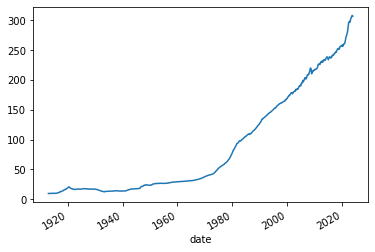

In [11]:
# 간단히 EDA를 해보겠습니다.
cpi_items_df['value'].plot()

# 1980년대, 그리고 2020년대 그래프의 기울기가 가파른것을 확인할 수 있습니다.

Text(0, 0.5, 'CPI Value')

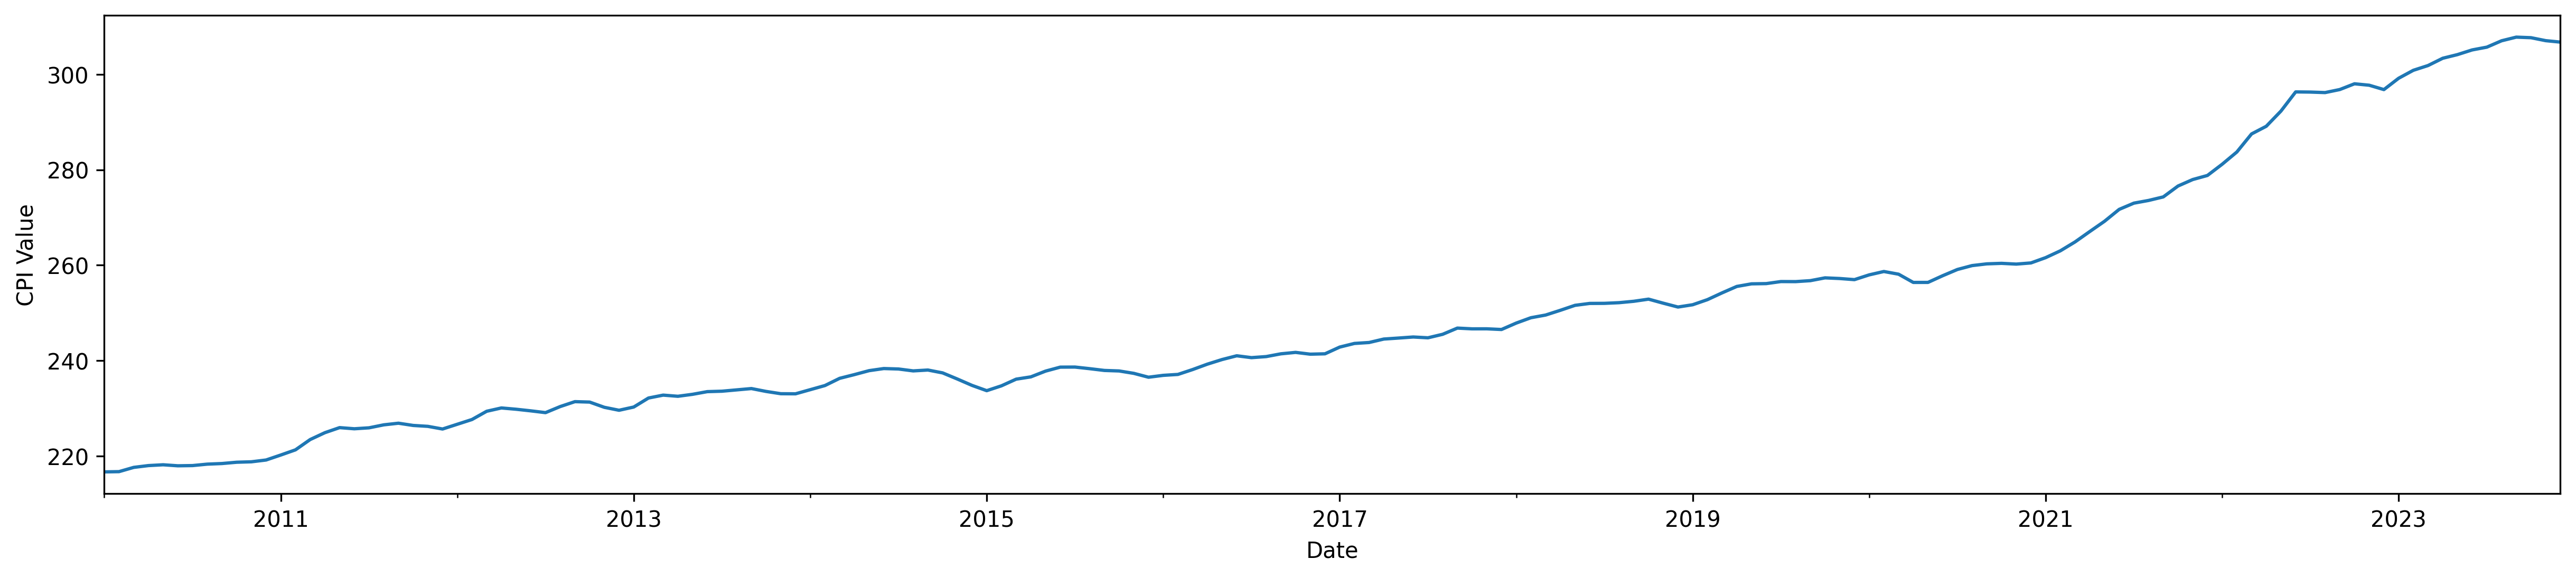

In [12]:
import matplotlib.pyplot as plt
# 최근 12년간 데이터 확인을 위해 2010년부터 2023년까지만 보겠습니다.
fig = plt.figure(dpi=300) # dots per inch 해상도

# 더 많은 기본 파라미터는 아래 document를 참고
# https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.figure.html

cpi_items_df['value'].loc['2010':'2023'].plot(figsize=(20,4))

plt.xlabel('Date')
plt.ylabel('CPI Value')

In [13]:
# Starting value
cpi_items_df['value'].loc['2010':'2023'].iloc[0]

216.687

In [14]:
start = cpi_items_df['value'].loc['2010':'2023'].iloc[0]
periods = len(cpi_items_df['value'].loc['2010':'2023'])//12 #12로 나눈 몫. 몇 년치 인지

In [15]:
print(start, periods)

216.687 14


In [16]:
cpi_items_df['value'].loc['2010':'2023']

date
2010-01-01    216.687
2010-02-01    216.741
2010-03-01    217.631
2010-04-01    218.009
2010-05-01    218.178
               ...   
2023-08-01    307.026
2023-09-01    307.789
2023-10-01    307.671
2023-11-01    307.051
2023-12-01    306.746
Name: value, Length: 168, dtype: float64

In [17]:
# 물가상승률 2% 기준으로 타켓 CPI를 계산하기 위해 함수를 만들어 줍니다.

def get_target_cpi(previous_cpi):
    return previous_cpi + 0.02*(previous_cpi)

In [18]:
target_cpis = [start]
target_cpis

[216.687]

In [19]:
get_target_cpi(target_cpis[0])

221.02074000000002

In [20]:
for year in range(0, periods):
    target_cpis.append(get_target_cpi(target_cpis[year]))

In [21]:
target_cpis

[216.687,
 221.02074000000002,
 225.44115480000002,
 229.949977896,
 234.54897745392,
 239.2399570029984,
 244.02475614305837,
 248.90525126591953,
 253.88335629123793,
 258.9610234170627,
 264.14024388540395,
 269.42304876311204,
 274.8115097383743,
 280.30773993314176,
 285.9138947318046]

In [22]:
len(target_cpis)

15

In [42]:
# 2010년부터 타겟 CPI 계산

In [23]:
dates = pd.date_range('2010-01-01','2024-01-01',periods=periods+1)
target_cpi_series = pd.Series(data =target_cpis, index= dates)

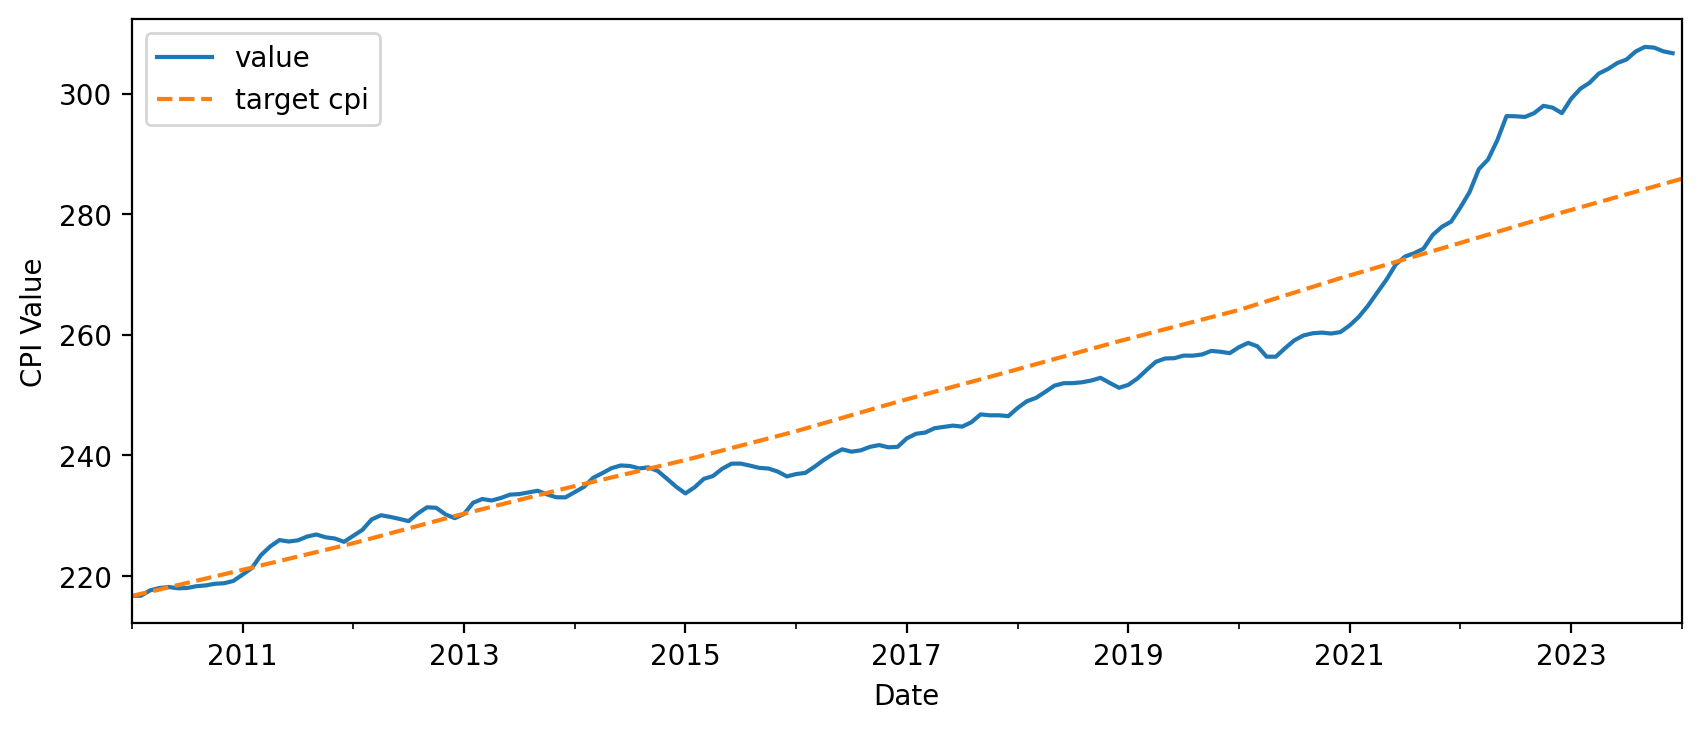

In [24]:
fig = plt.figure(dpi=200)
cpi_items_df['value'].loc['2010':'2023'].plot(figsize=(10,4))

target_cpi_series.plot(ls='--', label='target cpi') 
plt.xlabel('Date')
plt.ylabel('CPI Value');
plt.legend()

FED는 2010년부터 2020년까지 물가상승률을 타켓에 맞춰 잘 관리해온 것을 확인할 수 있습니다.  
단, 2020년 코로나 팬데믹때 크게 벗어난 것을 보실 수 있습니다.

### 1970 ~ 1980 년대와 비교

In [25]:
# Starting value
cpi_items_df['value'].loc['1969':'1980'].iloc[0]

35.6

In [26]:
start = cpi_items_df['value'].loc['1969':'1980'].iloc[0]
periods = len(cpi_items_df['value'].loc['1969':'1980'])//12

In [27]:
target_cpis = [start]
for year in range(0,periods):
    target_cpis.append(get_target_cpi(target_cpis[year]))

In [28]:
target_cpis

[35.6,
 36.312000000000005,
 37.03824,
 37.7790048,
 38.534584896000005,
 39.305276593920006,
 40.091382125798404,
 40.89320976831437,
 41.71107396368066,
 42.54529544295428,
 43.39620135181336,
 44.26412537884963,
 45.14940788642662]

In [29]:
dates = pd.date_range('1969-01-01','1981-01-01',periods=periods+1)
target_cpi_series = pd.Series(data =target_cpis, index= dates)

In [30]:
target_cpi_series

1969-01-01 00:00:00    35.600000
1970-01-01 06:00:00    36.312000
1971-01-01 12:00:00    37.038240
1972-01-01 18:00:00    37.779005
1973-01-01 00:00:00    38.534585
1974-01-01 06:00:00    39.305277
1975-01-01 12:00:00    40.091382
1976-01-01 18:00:00    40.893210
1977-01-01 00:00:00    41.711074
1978-01-01 06:00:00    42.545295
1979-01-01 12:00:00    43.396201
1980-01-01 18:00:00    44.264125
1981-01-01 00:00:00    45.149408
dtype: float64

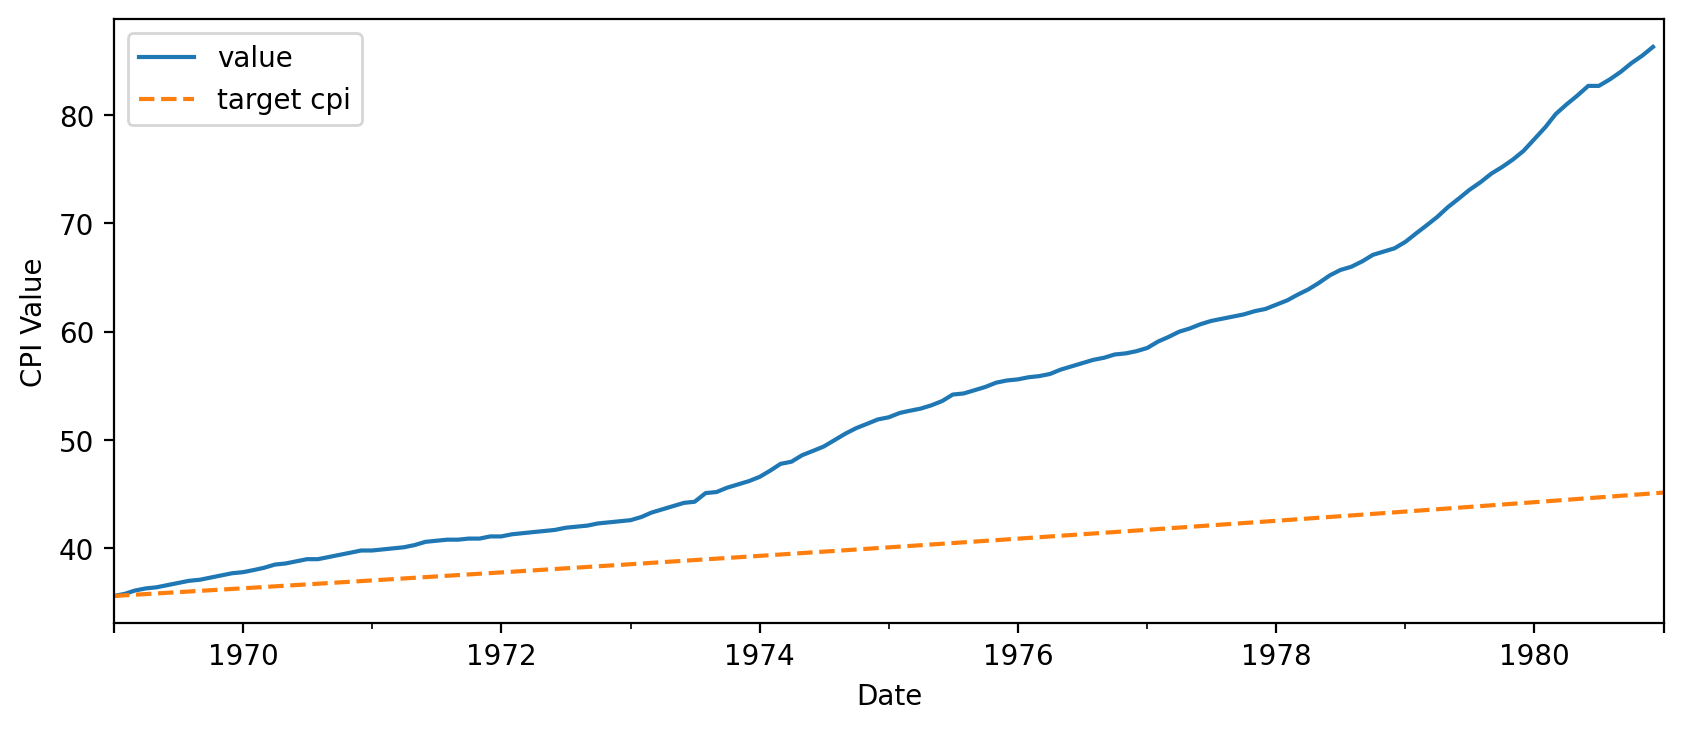

In [31]:
fig = plt.figure(dpi=200)
cpi_items_df['value'].loc['1969':'1980'].plot(figsize=(10,4))
target_cpi_series.plot(ls='--', label='target cpi') 
plt.xlabel('Date')
plt.ylabel('CPI Value');
plt.legend()

## Paul Volcker "The inflation fighter”

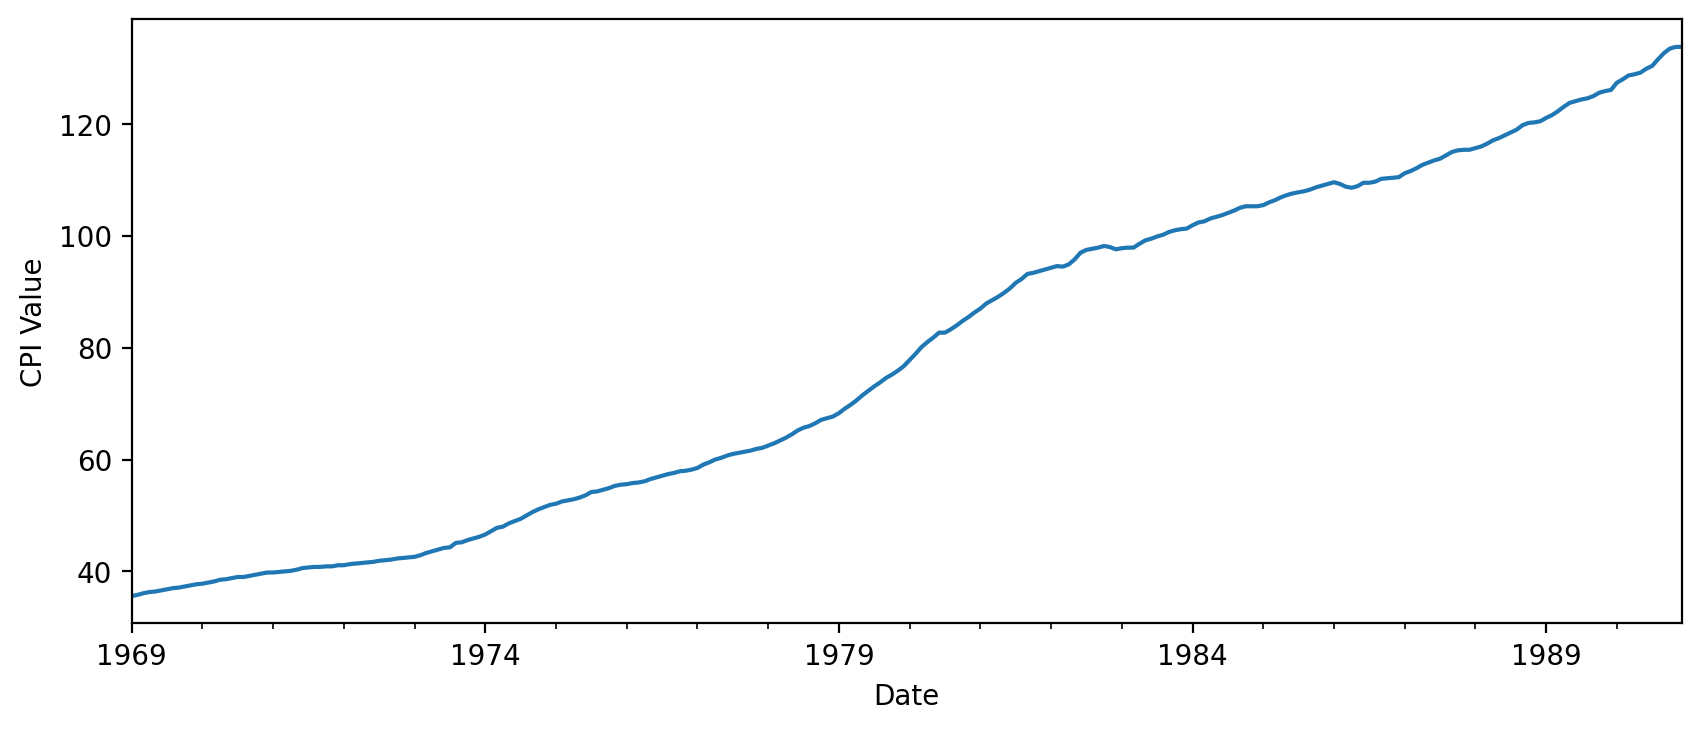

In [32]:
fig = plt.figure(dpi=200)
cpi_items_df['value'].loc['1969':'1990'].plot(figsize=(10,4))
plt.xlabel('Date')
plt.ylabel('CPI Value');

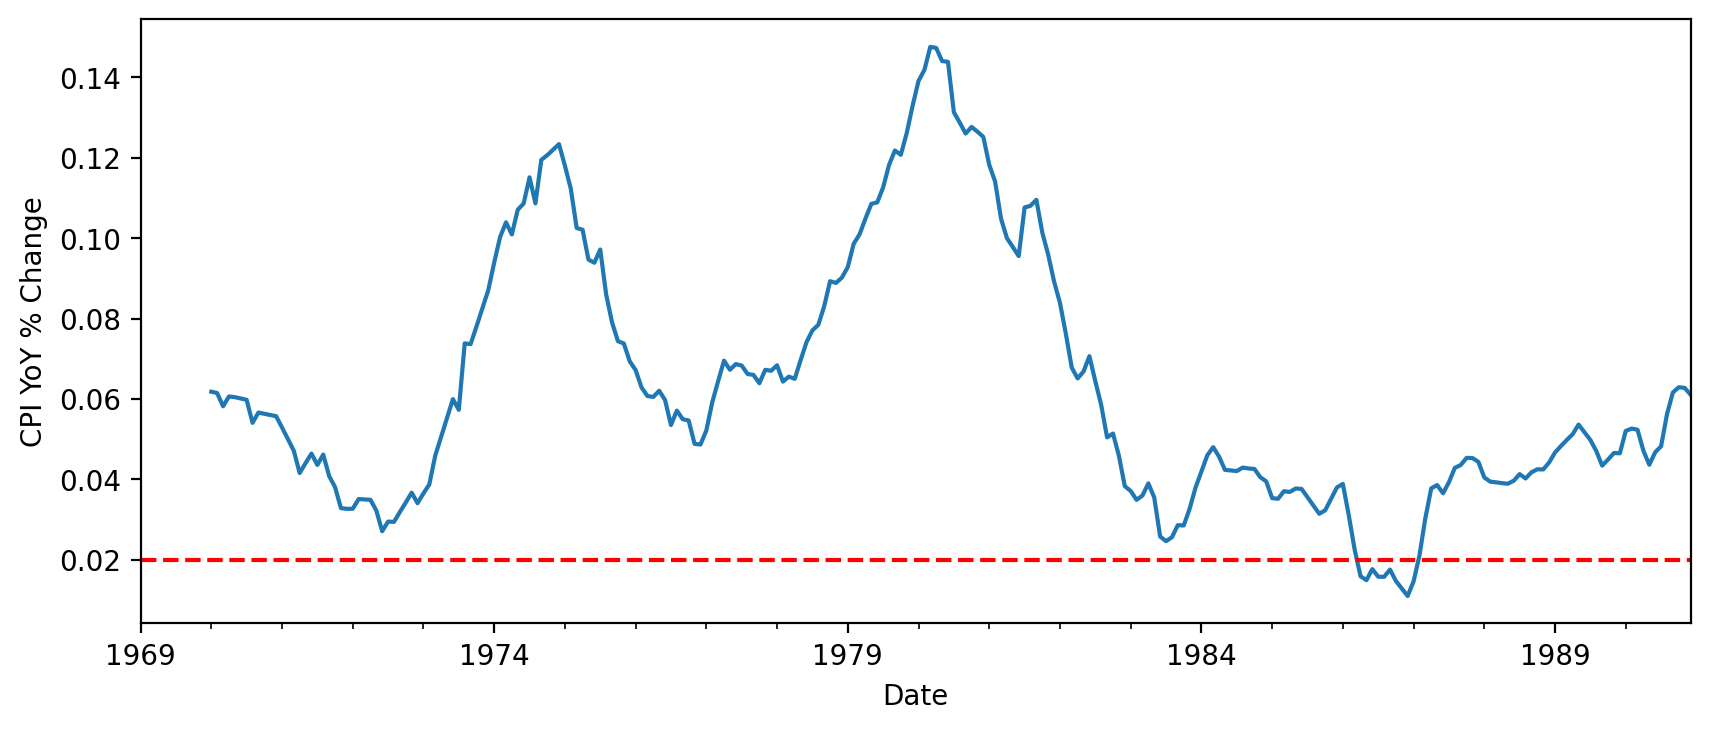

In [33]:
fig = plt.figure(dpi=200)

cpi_items_df['value'].loc['1969':'1990'].pct_change(12).plot(figsize=(10,4))

plt.axhline(0.02,ls='--',c='red') # 기준 물가상승률 2%
plt.xlabel('Date')
plt.ylabel('CPI YoY % Change');

In [34]:
cpi_items_df['value'].loc['1969':'1990']

date
1969-01-01     35.6
1969-02-01     35.8
1969-03-01     36.1
1969-04-01     36.3
1969-05-01     36.4
              ...  
1990-08-01    131.6
1990-09-01    132.7
1990-10-01    133.5
1990-11-01    133.8
1990-12-01    133.8
Name: value, Length: 264, dtype: float64

In [35]:
cpi_items_df['value'].loc['1969':'1990'].pct_change(12)

date
1969-01-01         NaN
1969-02-01         NaN
1969-03-01         NaN
1969-04-01         NaN
1969-05-01         NaN
                ...   
1990-08-01    0.056180
1990-09-01    0.061600
1990-10-01    0.062898
1990-11-01    0.062748
1990-12-01    0.061063
Name: value, Length: 264, dtype: float64

In [36]:
gas = cpi.series.get(items="Gasoline (all types)", seasonally_adjusted=False).to_dataframe()

In [37]:
gas = gas[gas['period_type']=='monthly']
gas['date'] = pd.to_datetime(gas['date'])
gas = gas.set_index('date')

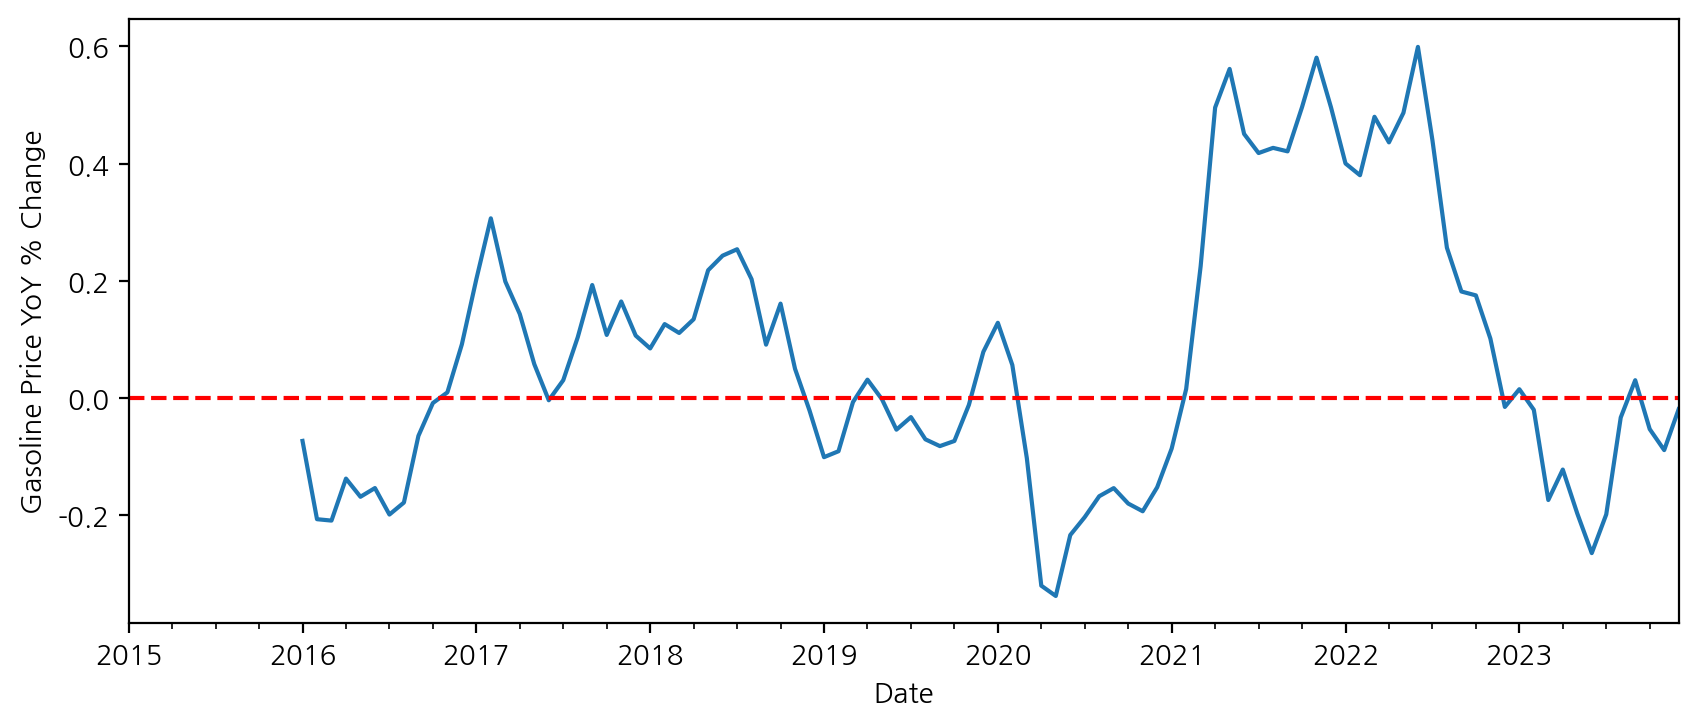

In [38]:
plt.rcParams['font.family']='NanumGothic'
plt.rcParams['axes.unicode_minus'] = False

fig = plt.figure(dpi=200)
gas['value'].loc['2015':'2023'].pct_change(12).plot(figsize=(10,4))
plt.axhline(0,ls='--',c='red')
plt.xlabel('Date')
plt.ylabel('Gasoline Price YoY % Change');

In [41]:
import FinanceDataReader as fdr

In [42]:
# df = fdr.DataReader(['CPIAUCSL'], start='1960', data_source='fred')
df = fdr.DataReader('FRED:CPIAUCSL', '1960-01-01')
df

,CPIAUCSL
DATE,
1960-01-01,29.370
1960-02-01,29.410
1960-03-01,29.410
1960-04-01,29.540
1960-05-01,29.570
...,...
2023-08-01,306.269
2023-09-01,307.481
2023-10-01,307.619


In [43]:
df['pct_yoy'] = df['CPIAUCSL'].pct_change(12)*100
df

,CPIAUCSL,pct_yoy
DATE,,
1960-01-01,29.370,NaN
1960-02-01,29.410,NaN
1960-03-01,29.410,NaN
1960-04-01,29.540,NaN
1960-05-01,29.570,NaN
...,...,...
2023-08-01,306.269,3.707504
2023-09-01,307.481,3.689903
2023-10-01,307.619,3.232356


In [44]:
df['date'] = df.index

In [45]:
df

,CPIAUCSL,pct_yoy,date
DATE,,,
1960-01-01,29.370,NaN,1960-01-01
1960-02-01,29.410,NaN,1960-02-01
1960-03-01,29.410,NaN,1960-03-01
1960-04-01,29.540,NaN,1960-04-01
1960-05-01,29.570,NaN,1960-05-01
...,...,...,...
2023-08-01,306.269,3.707504,2023-08-01
2023-09-01,307.481,3.689903,2023-09-01
2023-10-01,307.619,3.232356,2023-10-01


In [46]:
from IPython.core.display import display, HTML
import pandas as pd

pd.set_option("display.max_rows", 999)
pd.set_option("display.precision", 5)

# pd.options.display.max_rows

In [47]:
# 연도와 월 정보 추출
df['year']= df['date'].astype(str).str.split('-', expand=True)[0]
df['month']= df['date'].astype(str).str.split('-', expand=True)[1]

In [48]:
# 시점을 수정된 날짜로 재조정
df['date'] = df['year']+ "-" + df['month']

# 데이터 타입 변경 (문자열 -> 날짜)
df['date'] = pd.to_datetime(df['date'])

In [49]:
# import datetime as dt
# df['date'] = df['date'].dt.strftime('%Y-%m')

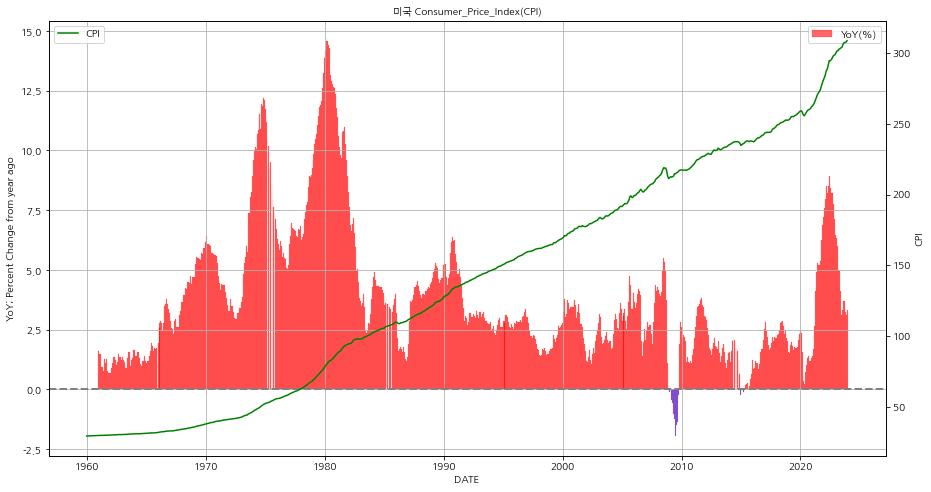

In [54]:
import matplotlib.pyplot as plt
import datetime

plt.figure(figsize=(15,8))

# 데이터
y1_value = df.pct_yoy
y2_value = df.CPIAUCSL

# 컬러 function
color_fuc = lambda x : 'r' if x >=0 else 'b'
color_list = list(y1_value.fillna(0).apply(color_fuc))

# 바차트 : YoY
plt.bar(df.date, y1_value, align='center',
         width=30, edgecolor = 'red',linewidth=0.2, color=color_list, alpha=0.6, label='YoY(%)') 

plt.xlabel('DATE')
plt.ylabel('YoY; Percent Change from year ago')
plt.grid()
# plt.xlim(datetime(1970,1,1),datetime(2030,1,1))
plt.margins(x=0)

plt.legend()
plt.axhline(color='gray', linestyle='--', linewidth=2)
# plt.text(datetime(2010,12,13),7.1,'2022년 12월 발표: 7.1%(YoY)', fontsize=16)

# 플롯차트 : CPI
plt.twinx()
plt.plot(df.date, y2_value, color='green', label='CPI')
plt.ylabel('CPI')

plt.title('미국 Consumer_Price_Index(CPI)', fontsize=4, font="NanumGothic")
plt.legend()
plt.show()